### KMS Validation with image classification

In [1]:
import os
import tensorflow as tf
import numpy as np

In [2]:
!git clone https://github.com/MamiSiaga/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 84 (delta 0), reused 0 (delta 0), pack-reused 82
Unpacking objects: 100% (84/84), done.


In [3]:
# Directory with our training dandelion pictures
train_kms_dir = '/content/MachineLearning/Data/KMS_validation/train/kms'

# Directory with our training grass pictures
train_not_dir = '/content/MachineLearning/Data/KMS_validation/train/not kms'

# Directory with our validation dandelion pictures
valid_kms_dir = '/content/MachineLearning/Data/KMS_validation/validation/kms'

# Directory with our validation grass pictures
valid_not_dir = '/content/MachineLearning/Data/KMS_validation/validation/not kms'

In [4]:
train_kms_names = os.listdir(train_kms_dir)
print(train_kms_names[:10])

train_not_names = os.listdir(train_not_dir)
print(train_not_names[:10])

validation_kms_names = os.listdir(valid_kms_dir)
print(validation_kms_names[:10])

validation_not_names = os.listdir(valid_not_dir)
print(validation_not_names[:10])

['image5.jpg', 'image8.jpg', 'image13.jpg', 'image1.jpg', 'image6.jpg', 'image11.jpg', 'image3.jpg', 'image10.jpg', 'image7.jpg', 'image2.jpg']
['not11.jpg', 'not4.jpg', 'not5.jpg', 'not13.jpg', 'not1.jpg', 'not2.jpg', 'not8.jpg', 'not3.jpg', 'not9.jpg', 'not10.jpg']
['image5.jpg', 'image1.jpg', 'image6.jpg', 'image3.jpg', 'image2.jpg', 'image4.jpg']
['not4.jpg', 'not5.jpg', 'not1.jpg', 'not2.jpg', 'not3.jpg', 'not6.jpg']


In [5]:
print('total training kms images:', len(os.listdir(train_kms_dir)))
print('total training not kms images:', len(os.listdir(train_not_dir)))
print('total validation kms images:', len(os.listdir(valid_kms_dir)))
print('total validation not kms images:', len(os.listdir(valid_not_dir)))

total training kms images: 13
total training not kms images: 13
total validation kms images: 6
total validation not kms images: 6


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_kms_fnames = os.listdir(train_kms_dir)
train_not_fnames = os.listdir(train_not_dir)

train_dir = '/content/MachineLearning/Data/KMS_validation/train'
validation_dir = '/content/MachineLearning/Data/KMS_validation/validation'

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 1,
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                          batch_size  = 1,
                                                          target_size = (150, 150))

Found 26 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [7]:
validation_generator.class_indices

{'kms': 0, 'not kms': 1}

In [8]:
from tensorflow import keras

tf.keras.backend.clear_session()
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit_generator(train_generator,
                              epochs = 10,
                              validation_data = validation_generator)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


26/26 [==============================] - 17s 128ms/step - loss: 0.7497 - accuracy: 0.5769 - val_loss: 0.6474 - val_accuracy: 0.5000
Epoch 2/10
26/26 [==============================] - 3s 92ms/step - loss: 0.6782 - accuracy: 0.5000 - val_loss: 0.6813 - val_accuracy: 0.5000
Epoch 3/10
26/26 [==============================] - 1s 40ms/step - loss: 0.5727 - accuracy: 0.7692 - val_loss: 0.5238 - val_accuracy: 0.8333
Epoch 4/10
26/26 [==============================] - 1s 42ms/step - loss: 0.3969 - accuracy: 0.8846 - val_loss: 0.2975 - val_accuracy: 0.9167
Epoch 5/10
26/26 [==============================] - 1s 40ms/step - loss: 0.1695 - accuracy: 0.9231 - val_loss: 0.3573 - val_accuracy: 0.7500
Epoch 6/10
26/26 [==============================] - 1s 38ms/step - loss: 0.1651 - accuracy: 0.9231 - val_loss: 0.4428 - val_accuracy: 0.5833
Epoch 7/10
26/26 [==============================] - 1s 40ms/step - loss: 0.1263 - accuracy: 0.9615 - val_loss: 0.1420 - val_accuracy: 1.0000
Epoch 8/10
26/26 [====

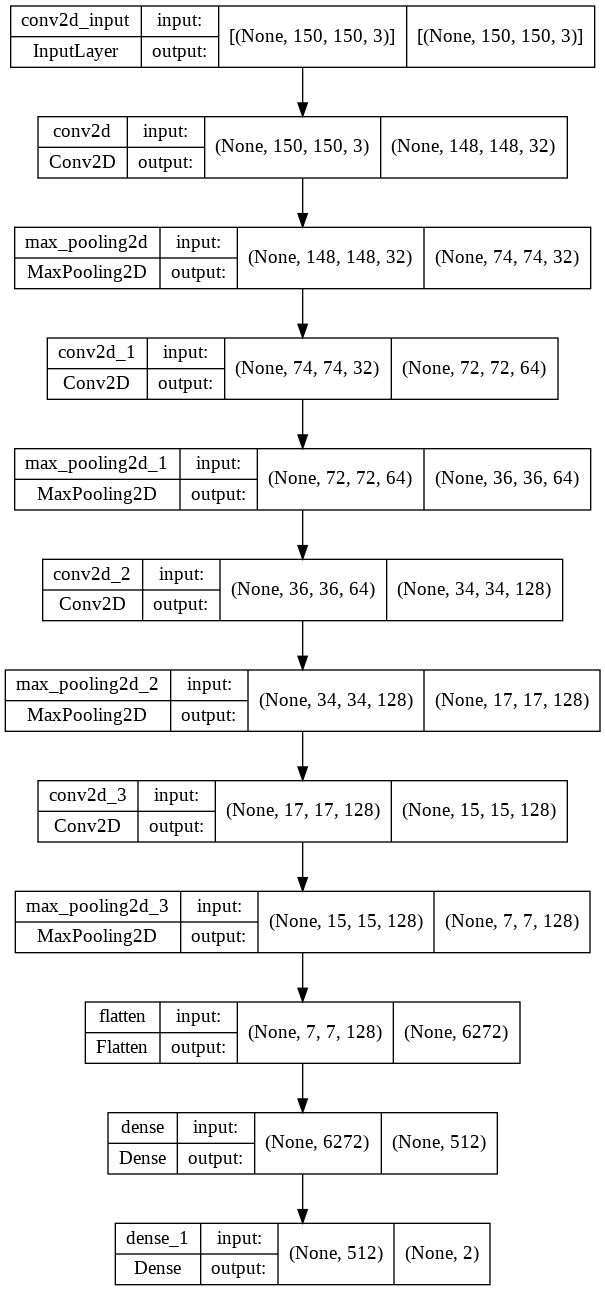

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='plot.png', show_shapes=True, show_layer_names=True)

In [12]:
def predict(path):
    image_path = path

    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(150, 150)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    images = np.vstack([img_array])

    predictions = model.predict(images)

    print(predictions)

In [14]:
predict("/content/MachineLearning/images/image1.jpg")

[[1. 0.]]


In [15]:
predict("/content/MachineLearning/images/image4.jpg")

[[1. 0.]]


In [16]:
predict('/content/MachineLearning/Data/KMS_validation/validation/not kms/not1.jpg')

[[0. 1.]]


In [22]:
predict('/content/MachineLearning/Data/KMS_validation/validation/not kms/not2.jpg')

[[0. 1.]]


## Save Model

In [27]:
model.save('/content/MachineLearning/Model')

INFO:tensorflow:Assets written to: /content/MachineLearning/Model/assets


INFO:tensorflow:Assets written to: /content/MachineLearning/Model/assets


In [28]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/MachineLearning/Model') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('/content/MachineLearning/Model/model.tflite', 'wb') as f:
  f.write(tflite_model)

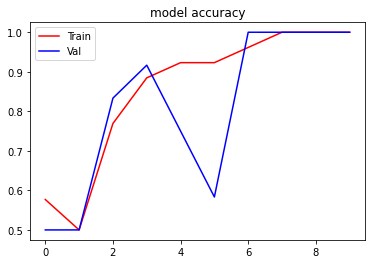

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Train')
plt.plot(epochs, val_acc, 'b', label='Val')
plt.title('model accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

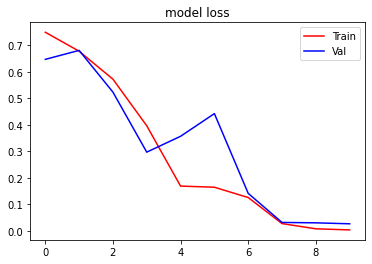

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, val_loss, 'b', label='Val')
plt.title('model loss')
plt.legend(loc=0)
plt.figure()


plt.show()